In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def Generate_Data():
    feature_1 = np.arange(0., 10., 0.2)
    m = len(feature_1)
    feature_0 = np.full(m, 1.0)
    X = np.vstack([feature_0, feature_1])
    theta = [[5, 2]]
    Y = np.dot(theta, X) + np.random.randn(m)
    print(theta)
    return X, Y

In [3]:
def Cost_Function_Error(X, Y, theta):
    hyp = np.dot(theta.T, X)
    error = np.sum(np.power(hyp - Y, 2)) / (2 * len(X.T))
    
    return error

In [4]:
def Batch_Gradient_Descent(X, Y, lr, theta):
    hyp = np.dot(theta.T, X)
    diff = np.dot(X, (hyp - Y).T)
    
    theta = theta - lr * diff / len(X.T)
    return theta

In [20]:
def  Stochastic_GD(X, Y, lr, theta):
    for i in range(len(X.T)):
        hyp = np.dot(theta.T, X[:,i])
        diff = np.dot(X[:,i].reshape((len(X),1)), (hyp - Y[:,i]).reshape(1,1))
        
        theta = theta - lr * diff / len(X.T)
    
    return theta

In [21]:
def Mini_GD(X, Y, lr, theta):
    mini_size = 5
    for i in range(0, len(X.T), mini_size):
        sum_diff = np.zeros(2).reshape((2,1))
        X_cut = X[:, i : i+5]
        Y_cut = Y[:, i : i+5]
        for k in range(0, mini_size, 1):
            hyp = np.dot(theta.T, X_cut[:,k])
            diff = np.dot(X_cut[:,k].reshape((len(X_cut),1)), (hyp - Y_cut[:,k]).reshape(1,1))
            sum_diff = diff + sum_diff 
        
        theta = theta - lr * sum_diff / mini_size
    return theta

In [22]:
def method_switch():
    return {
        0 : Batch_Gradient_Descent,
        1 : Stochastic_GD,
        2 : Mini_GD,
    }.get(method, 'None')

In [23]:
def optimizer(X, Y, lr, theta, iter_num, epsilon):
    last_theta = np.array([[0.0], [0.0]])
    for i in range(iter_num):
        func = method_switch()
        theta = func(X, Y, lr, theta)
        error = Cost_Function_Error(X, Y, theta)
        
        if np.linalg.norm(theta.T - last_theta.T) < epsilon:
            print('<Finish> Loop Count = {0}, theta = {1} {2}'.format(i, theta[0,0], theta[1,0]))
            break
        else:
            last_theta = theta
            print('         Loop Count = {0}, theta = {1} {2}'.format(i, theta[0,0], theta[1,0]))
        
    iter = i
    return theta, iter

In [24]:
def linear_regression(X, Y, lr, theta, iter_num, epsilon):
    print("Init theta {0} {1}, error {2}".format(theta[0,0], theta[1,0], Cost_Function_Error(X, Y, theta)))
    theta, count = optimizer(X, Y, lr, theta, iter_num, epsilon)
    print("Init theta {0} {1}, error {2}, iter {3}".format(theta[0,0], theta[1,0], Cost_Function_Error(X, Y, theta), count))
    return theta

In [30]:
def check_with_scipy_linear_regression(Y):
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(np.arange(0., 10., 0.2), Y)
    print("Intercept = {0}, Slope = {1}".format(intercept, slope))
    pass

In [38]:
def main():
    # init stop-iter-condition
    iter_num = 3000
    epsilon = 5e-4  
    
    lr = 0.009
    X = Y = pd.DataFrame()
    X, Y = Generate_Data()
    
    # init theta
    np.random.seed(0)
    #theta = np.random.randn(2).reshape((2, 1))
    theta = np.array([[0.0], [0.0]])
    theta = linear_regression(X, Y, lr, theta, iter_num, epsilon)

    plt.plot(np.arange(0., 10., 0.2), Y.T, 'g*')
    plt.plot(np.arange(0., 10., 0.2), np.dot(theta.T, X).T, 'r')
    plt.show()
    check_with_scipy_linear_regression(Y)

[[5, 2]]
Init theta 0.0 0.0, error 126.50379836901429
         Loop Count = 0, theta = 0.13446503345081787 0.7980197518376326
         Loop Count = 1, theta = 0.2325272105445388 1.357837966730223
         Loop Count = 2, theta = 0.30501884476765295 1.7503909499863428
         Loop Count = 3, theta = 0.3595464677211642 2.025490580866697
         Loop Count = 4, theta = 0.4014514483462703 2.2181150450107654
         Loop Count = 5, theta = 0.434484545276997 2.3528262229754944
         Loop Count = 6, theta = 0.46127958138710257 2.4468716059071642
         Loop Count = 7, theta = 0.4836860607849306 2.5123624785902865
         Loop Count = 8, theta = 0.5030027343828525 2.557803452128815
         Loop Count = 9, theta = 0.520141610985344 2.589166510603551
         Loop Count = 10, theta = 0.5357431268196772 2.6106452128204607
         Loop Count = 11, theta = 0.5502570182437356 2.625184297121822
         Loop Count = 12, theta = 0.5639991110272875 2.6348515729346285
         Loop Count = 13

         Loop Count = 1258, theta = 5.533744563470366 1.903696083634448
         Loop Count = 1259, theta = 5.534452898561671 1.9035879181203952
         Loop Count = 1260, theta = 5.5351596287363245 1.9034799976833359
         Loop Count = 1261, theta = 5.53586475763068 1.903372321767985
         Loop Count = 1262, theta = 5.536568288872854 1.903264889820315
         Loop Count = 1263, theta = 5.5372702260827396 1.903157701287554
         Loop Count = 1264, theta = 5.537970572872031 1.9030507556181824
         Loop Count = 1265, theta = 5.538669332844239 1.9029440522619303
         Loop Count = 1266, theta = 5.539366509594707 1.9028375906697745
         Loop Count = 1267, theta = 5.540062106710636 1.9027313702939361
         Loop Count = 1268, theta = 5.540756127771095 1.9026253905878767
         Loop Count = 1269, theta = 5.541448576347047 1.9025196510062967
         Loop Count = 1270, theta = 5.542139456001364 1.9024141510051318
         Loop Count = 1271, theta = 5.5428287702888435

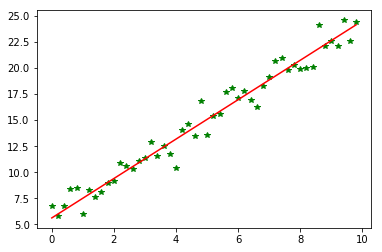

Intercept = 5.846370518808193, Slope = 1.855956888470389


In [39]:
# Method:[0,1,2] / [Normal_GD, Stochastic_GD]
method = 0
main()

[[5, 2]]
Init theta 0.0 0.0, error 126.50379836901429
         Loop Count = 0, theta = 0.13446503345081787 0.7980197518376326
         Loop Count = 1, theta = 0.2325272105445388 1.357837966730223
         Loop Count = 2, theta = 0.30501884476765295 1.7503909499863428
         Loop Count = 3, theta = 0.3595464677211642 2.025490580866697
         Loop Count = 4, theta = 0.4014514483462703 2.2181150450107654
         Loop Count = 5, theta = 0.434484545276997 2.3528262229754944
         Loop Count = 6, theta = 0.46127958138710257 2.4468716059071642
         Loop Count = 7, theta = 0.4836860607849306 2.5123624785902865
         Loop Count = 8, theta = 0.5030027343828525 2.557803452128815
         Loop Count = 9, theta = 0.520141610985344 2.589166510603551
         Loop Count = 10, theta = 0.5357431268196772 2.6106452128204607
         Loop Count = 11, theta = 0.5502570182437356 2.625184297121822
         Loop Count = 12, theta = 0.5639991110272875 2.6348515729346285
         Loop Count = 13

         Loop Count = 1121, theta = 5.419803869699818 1.9210952692240213
         Loop Count = 1122, theta = 5.420770366950558 1.9209476813475483
         Loop Count = 1123, theta = 5.421734674351394 1.920800427869644
         Loop Count = 1124, theta = 5.422696796863998 1.9206535080326417
         Loop Count = 1125, theta = 5.4236567394388 1.9205069210805914
         Loop Count = 1126, theta = 5.424614507015015 1.920360666259256
         Loop Count = 1127, theta = 5.425570104520665 1.9202147428161076
         Loop Count = 1128, theta = 5.426523536872606 1.9200691500003226
         Loop Count = 1129, theta = 5.427474808976557 1.9199238870627795
         Loop Count = 1130, theta = 5.428423925727118 1.9197789532560534
         Loop Count = 1131, theta = 5.4293708920078 1.9196343478344133
         Loop Count = 1132, theta = 5.4303157126910495 1.9194900700538178
         Loop Count = 1133, theta = 5.4312583926382745 1.919346119171911
         Loop Count = 1134, theta = 5.432198936699867 1.

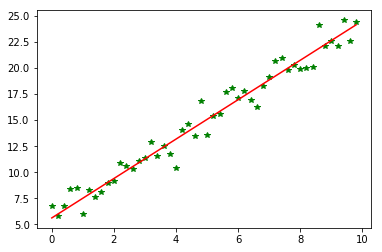

TypeError: check_with_scipy_linear_regression() missing 1 required positional argument: 'Y'

In [37]:
main()